In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from x2 import X2Env
env = X2Env()

# import gymnasium as gym
# env = gym.make("CartPole-v1", max_episode_steps=200, render_mode="rgb_array")

In [3]:
from code.rng import set_seeds, SEED
set_seeds()

/home/guillaume/rainbow-is-all-you-need/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
from code.agent import DQNAgent

# parameters
num_frames = 30000
memory_size = 10000
batch_size = 128
target_update = 100

# train
agent = DQNAgent(env, memory_size, batch_size, target_update, SEED)

26 5
cuda


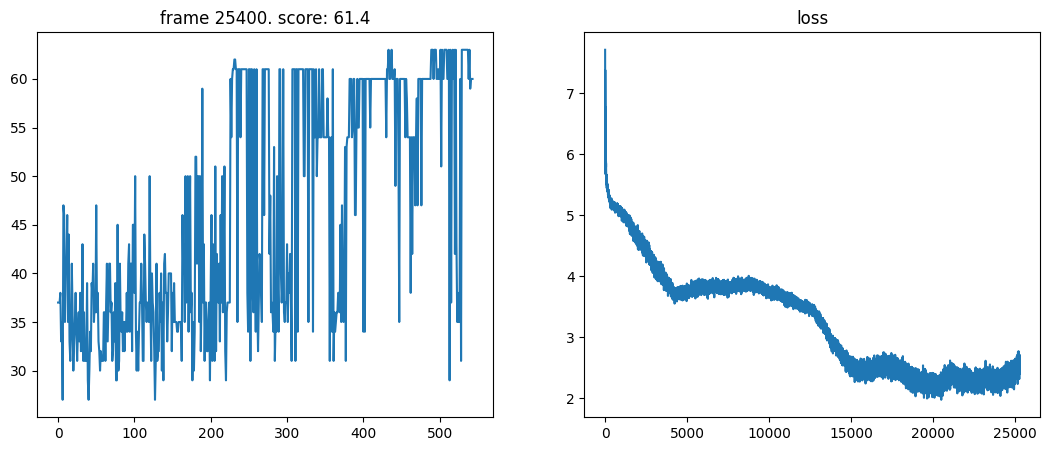

KeyboardInterrupt: 

In [5]:
agent.train(num_frames)

In [7]:
from typing import List
import numpy as np

env = X2Env()
state, _ = env.reset()

rewards: List[int] = []

for s in range(1000):
    env.reset(seed=s)
    r = 0

    while True:
        action = agent.select_action(state)
        state, reward, done, _, _ = env.step(action)

        r += reward

        if done:
            rewards.append(r)
            break
            
env.close()

np.mean(rewards), np.std(rewards)

(37.691, 6.271644042832788)